# Evaluation of Matching Survey

In [120]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns 
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("matching_results.csv")
del df["Zeitstempel"]

## Show mean rating per participant

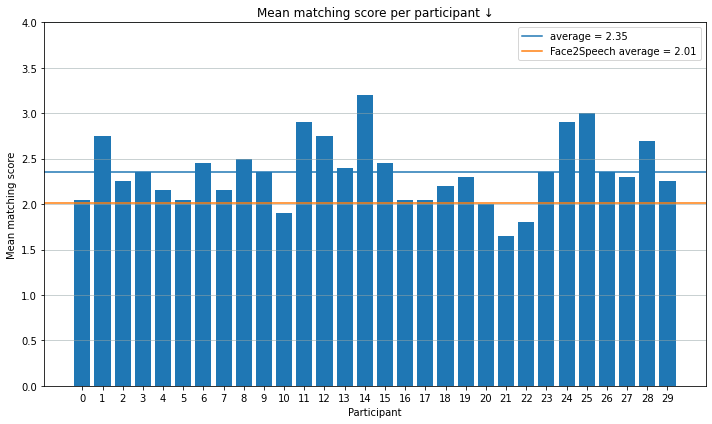

In [211]:
per_participant = pd.DataFrame(df.T.mean()).T
xs = list(range(30))
fig = plt.figure(figsize=(10, 6))
plt.grid(color='#95a5a6', linewidth=1, axis='y', alpha=0.5)
plt.bar(xs,df.T.mean())# , yerr=df.T.std(),capsize=5)
plt.axhline(df.T.mean().mean(), color="tab:blue", label=f"average = {df.T.mean().mean():.2f}")
plt.axhline(2.01, color="tab:orange", label="Face2Speech average = 2.01")
plt.legend()
plt.yticks(np.arange(0,4.5,0.5))
plt.xlabel("Participant")
plt.ylabel("Mean matching score")
plt.title("Mean matching score per participant ↓")
plt.xticks(xs)
plt.tight_layout()
plt.savefig("matching_per_participants_sorted.pdf")
plt.show()

## Show means per sample

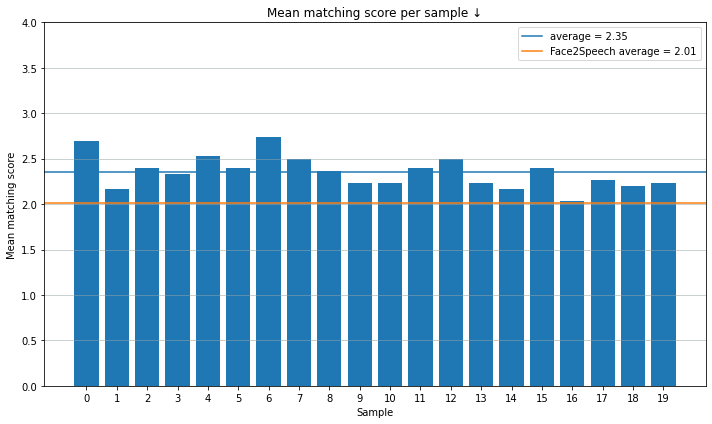

In [212]:
means_df = pd.DataFrame(df.mean())
per_sample = [x.item() for name, x in pd.DataFrame(df.mean()).T.items()]
xs = list(range(20))
fig = plt.figure(figsize=(10, 6))
plt.grid(color='#95a5a6', linewidth=1, axis='y', alpha=0.5)
plt.bar(xs, df.mean())# , yerr=df.std(), capsize=5)
plt.axhline(np.mean(per_sample), color="tab:blue", label="average = 2.35")
plt.axhline(2.01, color="tab:orange", label="Face2Speech average = 2.01")
plt.legend()
plt.xticks(xs)
plt.yticks(np.arange(0,4.5,0.5))
plt.xlabel("Sample")
plt.ylabel("Mean matching score")
plt.title("Mean matching score per sample ↓")
plt.tight_layout()
plt.savefig("matching_per_sample.pdf")
plt.show()

## Calculate mean and 95% confidence interval

In [124]:
m = means_df.mean()
l,t = st.t.interval(alpha=0.95, df=len(means_df)-1, loc=m, scale=st.sem(means_df)) 

print(f"Mean rating: {float(m):.2f} +- {float(m-l):.2f}")

Mean rating: 2.35 +- 0.08


### Variance over participants

In [160]:
m = df.T.mean().mean()
vals = df.T.mean().values
variance = np.sum((vals-m)**2) / (len(vals)-1)
variance

0.13249712643678163

### Variance over samples

In [162]:
m = df.mean().mean()
vals = df.mean().values
variance = np.sum((vals-m)**2) / (len(vals)-1)
variance

0.032102339181286556

### Standard deviation over samples

In [194]:
df.mean().std()

0.17917125657115474

### Standard deviation over participants

In [197]:
df.T.mean().std()

0.3640015472999828